In [2]:
import numpy as np
import matplotlib.pyplot as plt
import func
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from sklearn.linear_model import LinearRegression

In [3]:
fitdata=np.loadtxt('fitcleveland.csv',delimiter=',',skiprows=True)

In [4]:
testdata=np.loadtxt('6cleveland.csv',delimiter=',',skiprows=True)

In [5]:
Y=fitdata[:,0]
X=fitdata[:,1:]

In [6]:
betaols=func.Beta1(X,Y)
betaols[0]

array([ -3.98332112, -10.22346995,  -0.95788309,  -9.55468313,
        -3.58302205,  -0.4142761 ])

In [7]:
fitY=np.dot(X,betaols[0])+betaols[1]

In [8]:
np.savetxt('fitY.csv',fitY,delimiter=',')

In [9]:
Xnew=testdata

In [10]:
betaols0=func.Beta1(Xnew,fitY)

In [11]:
betaols0

(array([-0.34521327, -4.3180614 , -0.02984173, -0.0082428 ,  0.16058644,
        -1.33715132]),
 178.62852582362117)

In [12]:
ca0=(fitY-np.dot(Xnew,betaols0[0])).T

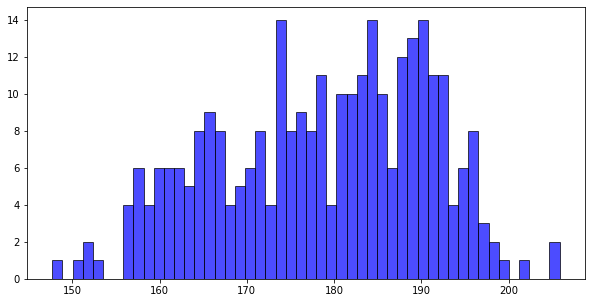

In [17]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax1.hist(ca0, bins=50,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [13]:
ca=ca0[:,None]

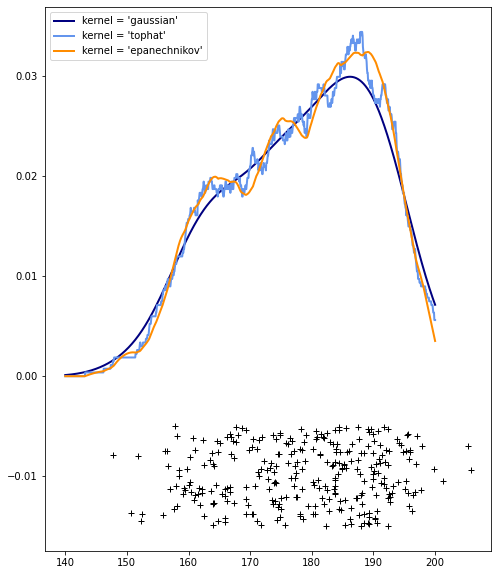

In [14]:
X_plot = np.linspace(140, 200, 1000)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,10))
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=4.5).fit(ca)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )


ax.legend(loc="upper left")
ax.plot(ca[:, 0], -0.005 - 0.01 * np.random.random(ca.shape[0]), "+k")

plt.show()